<a href="https://colab.research.google.com/github/chillMLguy/ML24-25L/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

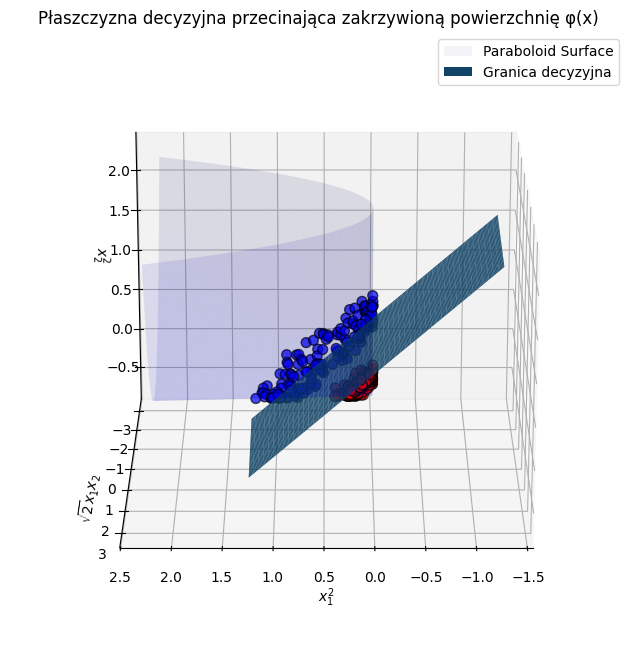

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# Dane: dwa współśrodkowe okręgi
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
y = np.where(y == 0, -1, 1)

# SVM z wielomianowym jądrem 2 stopnia
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)



# Transformacja φ(x) = [x1^2, sqrt(2)*x1*x2, x2^2]
phi = lambda x: np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])
phi_X = np.array([phi(x) for x in X])

clf2 = SVC(kernel='linear', C=1.0)
clf2.fit(phi_X, y)
w = clf2.coef_[0]
b = clf2.intercept_[0]



u = np.linspace(-1.5, 1.5, 50)  # x1 range
v = np.linspace(-1.5, 1.5, 50)  # x2 range
U, V = np.meshgrid(u, v)

# Parametric equations for the paraboloid
X_parab = U**2
Y_parab = np.sqrt(2)*U*V
Z_parab = V**2




# Siatka punktów do obliczeń
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
phi_grid = np.array([phi(x) for x in grid])
decision = clf.decision_function(grid)
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

# Rysowanie 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dane w przestrzeni φ(x)
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolor='k', s=50, alpha=0.7)

ax.plot_surface(X_parab, Y_parab, Z_parab, alpha=0.05, color='blue',
                          edgecolor='none', label='Paraboloid Surface')

# Granica decyzyjna
mask = np.isclose(decision, 0, atol=0.01)
ax.plot_surface(xx, yy, zz,  label='Granica decyzyjna')
ax.view_init(elev=20, azim=90)

# Oś i legenda
ax.set_title("Płaszczyzna decyzyjna przecinająca zakrzywioną powierzchnię φ(x)")
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2}x_1x_2$')
ax.set_zlabel('$x_2^2$')
ax.legend()
plt.show()


In [20]:
X

array([[-0.24183046,  0.42516296],
       [ 0.20976262, -0.48994789],
       [ 0.42792617,  0.04011244],
       [ 0.8816257 ,  0.41698355],
       [-0.47008918, -0.17129691],
       [-0.50576803,  0.01607921],
       [-0.19690914,  0.50749348],
       [-0.09380447, -1.00637942],
       [ 0.93184527,  0.18226342],
       [ 0.28550546,  0.43763665],
       [-0.40664959, -0.15272996],
       [-0.71742094,  0.64410026],
       [-0.42578857,  0.14708394],
       [-0.26539464,  1.00436644],
       [ 0.06622503,  0.55588968],
       [-0.44774192,  0.05318915],
       [ 0.46307834, -0.20945722],
       [-0.41526403,  0.32029147],
       [ 1.06836068, -0.08331252],
       [ 0.47105256,  0.34330276],
       [-0.98049989, -0.11652419],
       [-0.03668585, -1.0748191 ],
       [-0.25966226, -0.46496041],
       [-0.25198181, -0.45974584],
       [-0.43799687, -0.91941676],
       [-0.2081079 ,  0.98629719],
       [ 0.30517566, -0.3739772 ],
       [ 0.56709281, -0.0975283 ],
       [ 0.50613857,